## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [24]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import make_classification

In [66]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

X,y=make_classification(n_samples =10000 ,n_features = 8, n_informative=2 ,class_sep = 2, random_state=42)

df = pd.DataFrame(np.c_[X, y])



df

,0,1,2,3,4,5,6,7,8
0,0.275692,1.763346,-0.744605,0.549883,2.211386,1.442042,-1.353127,-0.923364,1.0
1,-0.758482,-1.374910,-0.131982,0.655164,1.615805,1.962221,0.632976,1.125327,1.0
2,0.027958,-2.589141,-0.381883,-1.045836,2.031171,2.760284,1.319815,0.051219,1.0
3,1.516905,-2.674736,-1.488545,-0.179956,-0.862206,0.115665,1.737565,-0.607409,0.0
4,1.219268,-2.065218,1.191254,1.810378,2.487252,3.003029,0.943171,0.661590,1.0
...,...,...,...,...,...,...,...,...,...
9995,-0.092749,1.386361,-1.282871,0.144910,1.092817,0.536955,-0.982234,-1.828827,1.0
9996,1.017992,-1.914325,-0.187844,1.314013,1.780276,2.298225,0.940634,-0.433608,1.0
9997,-0.172260,2.273101,0.125422,-0.765759,2.985119,1.983166,-1.761285,0.067943,1.0
9998,-1.296269,2.121442,-0.770104,0.486702,-1.445117,-2.059153,-1.109098,-0.241139,0.0


In [33]:
# Check duplicate values and missing data.
df.info()
df.duplicated().sum()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
dtypes: float64(9)
memory usage: 703.2 KB


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

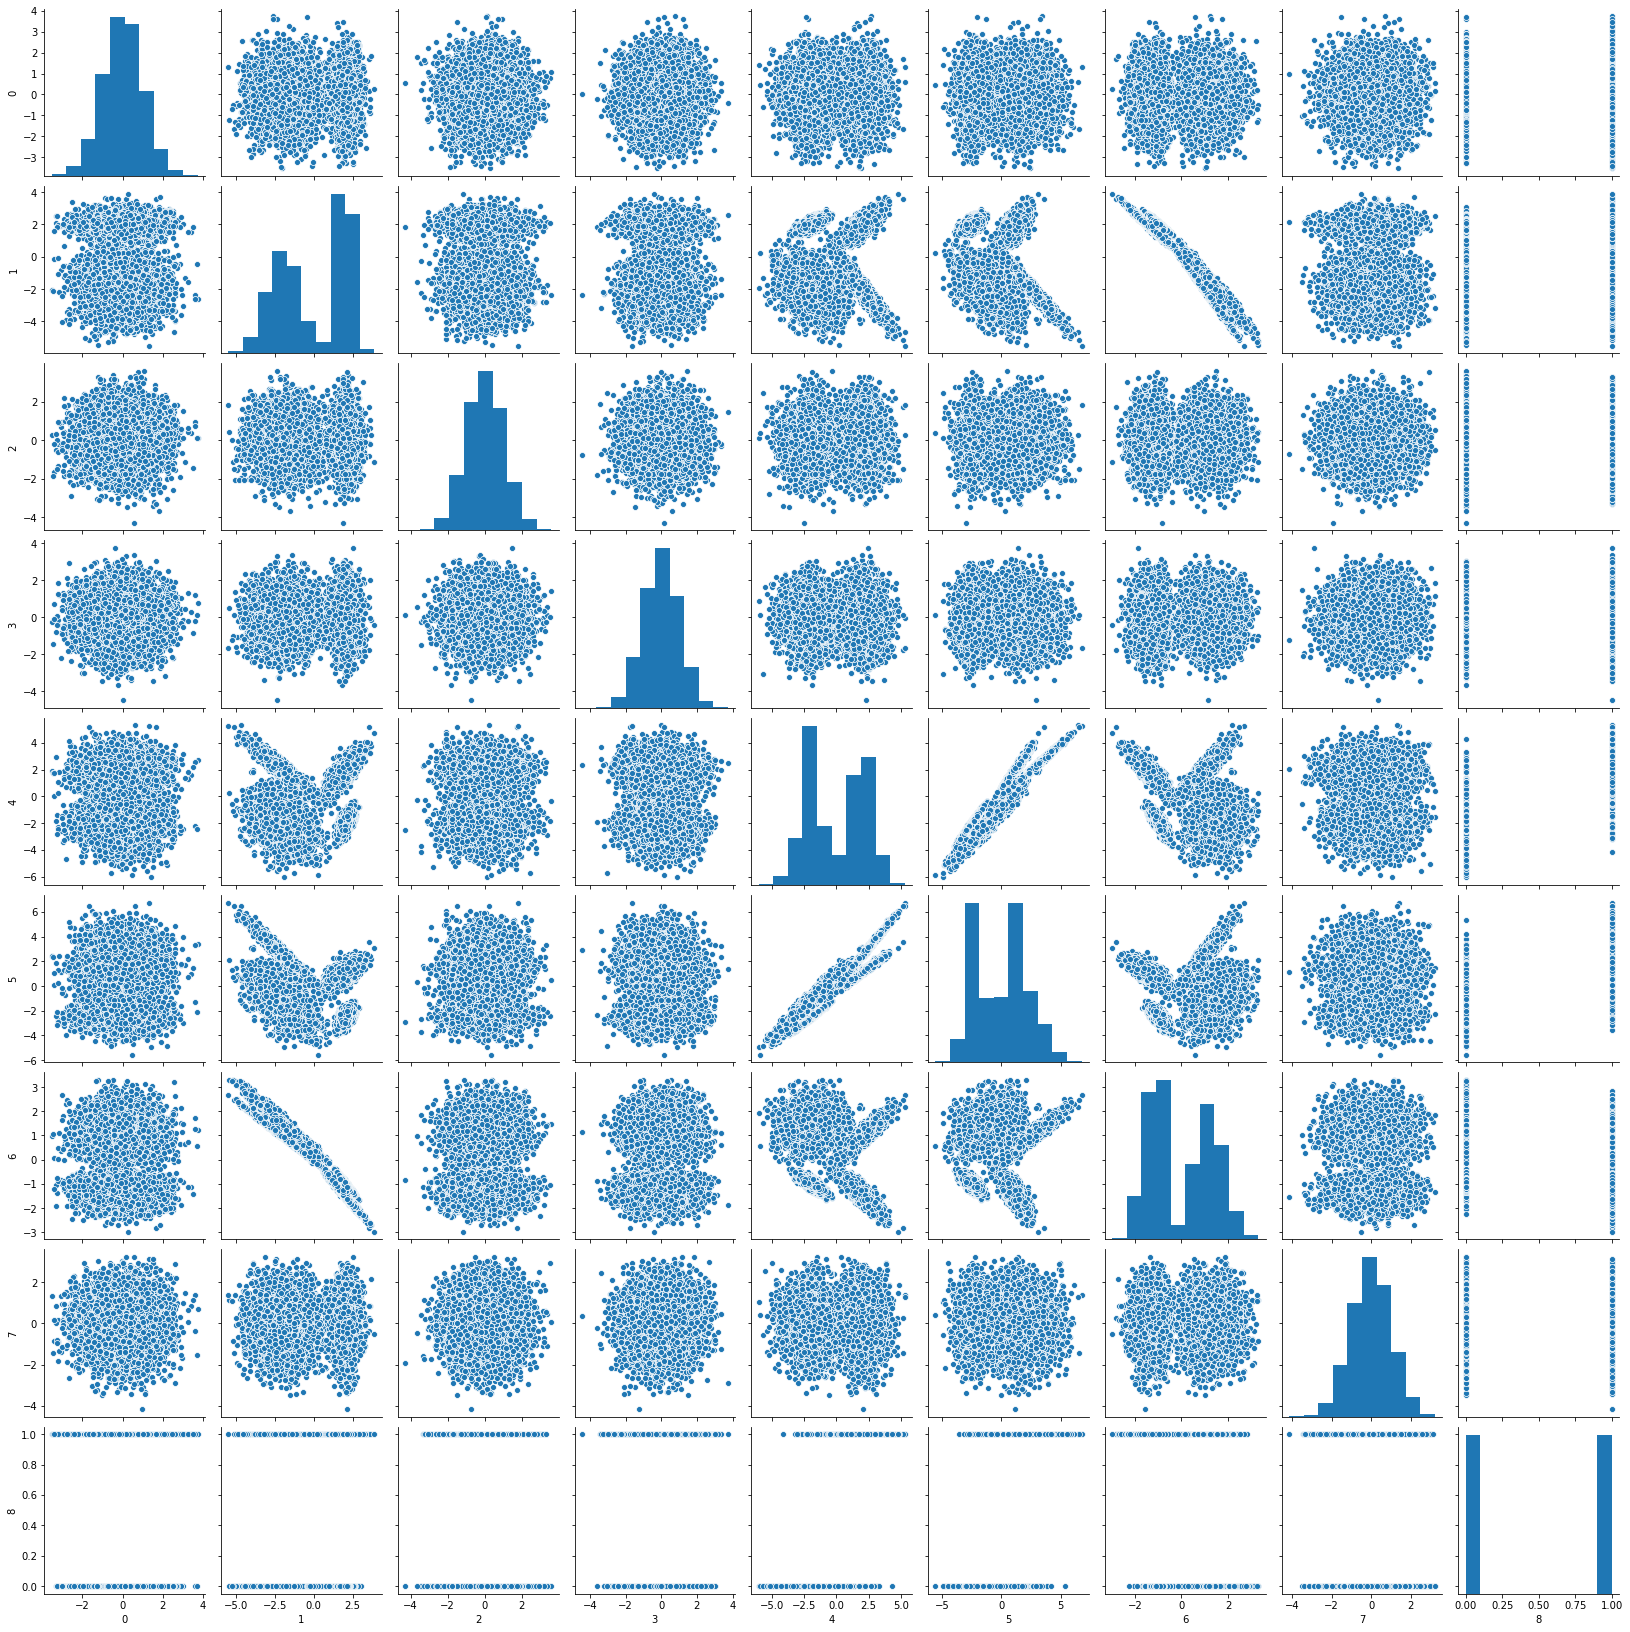

In [34]:
# Visualize data for each feature (pairplot,distplot).

sns.pairplot(df)

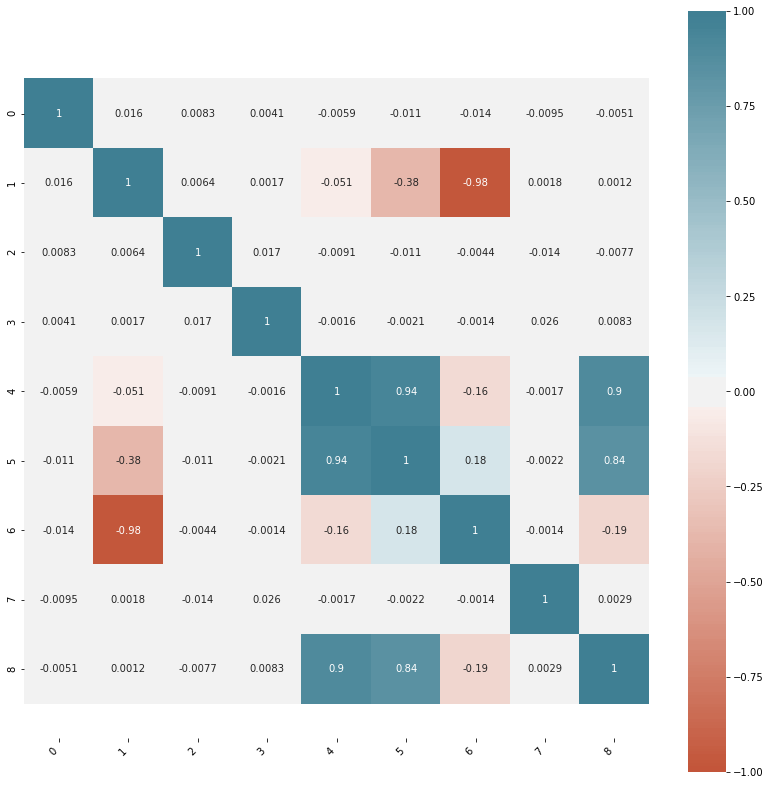

In [38]:
# Draw correlation matrix.
from matplotlib import pyplot as plt
df.corr()

import seaborn as sns
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [43]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

outliers = list(set(np.where(z > 3)[0]))
len(outliers)


new_df = df.drop(outliers,axis = 0).reset_index(drop = False)

y_new = y[list(new_df["index"])]

len(y_new)

X_new = new_df.drop('index', axis = 1)

display(X_new)

,0,1,2,3,4,5,6,7,8
0,0.275692,1.763346,-0.744605,0.549883,2.211386,1.442042,-1.353127,-0.923364,1.0
1,-0.758482,-1.374910,-0.131982,0.655164,1.615805,1.962221,0.632976,1.125327,1.0
2,0.027958,-2.589141,-0.381883,-1.045836,2.031171,2.760284,1.319815,0.051219,1.0
3,1.516905,-2.674736,-1.488545,-0.179956,-0.862206,0.115665,1.737565,-0.607409,0.0
4,1.219268,-2.065218,1.191254,1.810378,2.487252,3.003029,0.943171,0.661590,1.0
...,...,...,...,...,...,...,...,...,...
9890,-0.092749,1.386361,-1.282871,0.144910,1.092817,0.536955,-0.982234,-1.828827,1.0
9891,1.017992,-1.914325,-0.187844,1.314013,1.780276,2.298225,0.940634,-0.433608,1.0
9892,-0.172260,2.273101,0.125422,-0.765759,2.985119,1.983166,-1.761285,0.067943,1.0
9893,-1.296269,2.121442,-0.770104,0.486702,-1.445117,-2.059153,-1.109098,-0.241139,0.0


In [45]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

In [53]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))


Accuracy of train: 1.0
Accuracy of test: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1492
           1       1.00      1.00      1.00      1477

    accuracy                           1.00      2969
   macro avg       1.00      1.00      1.00      2969
weighted avg       1.00      1.00      1.00      2969



In [54]:
# Visualize feature importances.


plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

NameError: name 'categories' is not defined

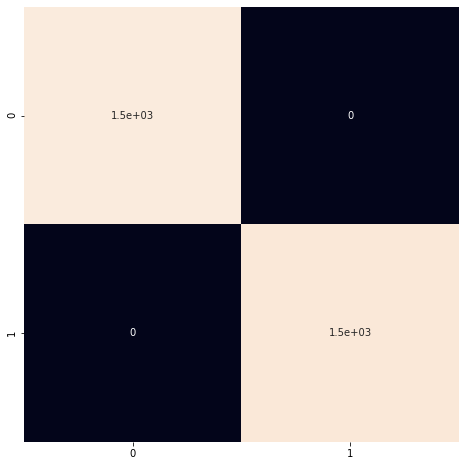

In [56]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()



In [ ]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
!pip install xgboost


In [ ]:
import xgboost as xgb
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)




preds = model.predict(dmatrix_test)
preds[:10]




from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27)

clf = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf.best_score_))
print("Train Score {:.6f}".format(clf.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf.refit_time_))



In [ ]:
# Visualize feature importances.

In [ ]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

In [ ]:
# Evaluate your result and select best performing algorithm for our case.